# We will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story. 


##Politics: 0 Technology: 1 Entertainment: 2 Business: 3

By Bidirectional LSTM

In [40]:
import pandas as pd
df=pd.read_excel(r'drive/MyDrive/Data_Train.xlsx')
df.rename(columns={"STORY": "text","SECTION" :"target"},inplace=True)
df.head()

,text,target
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [41]:
#DATA CLEANING FOR NLP Purpose

import re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')


def remove_url(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  return text

def remove_html(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def remove_punct(text):
  return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
  stop_words = set(stopwords.words('english')) 
  word_tokens = word_tokenize(text) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  return " ".join(filtered_sentence)


df['text']=df['text'].map(lambda x:remove_url(x))
df['text']=df['text'].map(lambda x:remove_html(x))
df['text']=df['text'].map(lambda x:remove_emoji(x))
df['text']=df['text'].map(lambda x:remove_punct(x))
df['text']=df['text'].map(remove_stopwords)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,target
0,But painful huge reversal fee income unheard a...,3
1,How formidable opposition alliance among Congr...,0
2,Most Asian currencies trading lower today Sout...,3
3,If want answer question click ‘ Answer ’ After...,1
4,In global markets gold prices edged today disa...,3


In [42]:
from collections import Counter
#Counting value count of each words 

def count_words(text):
  count=Counter()
  for i in df['text'].values:
    for words in i.split():
      count[words]+=1
  return count

counter=count_words(df['text'])
counter

Counter({'But': 690,
         'painful': 8,
         'huge': 128,
         'reversal': 6,
         'fee': 28,
         'income': 178,
         'unheard': 1,
         'among': 426,
         'private': 153,
         'sector': 142,
         'lenders': 33,
         'Essentially': 2,
         'means': 168,
         'Yes': 64,
         'Bank': 278,
         'took': 203,
         'granted': 14,
         'fees': 42,
         'structured': 9,
         'loan': 90,
         'deals': 53,
         'paid': 79,
         'accounted': 29,
         'upfront': 10,
         'books': 27,
         'As': 353,
         'borrowers': 12,
         'turned': 88,
         'defaulters': 1,
         'tied': 28,
         'fell': 221,
         'cracks': 3,
         'Gill': 14,
         'vowed': 5,
         'shift': 78,
         'safer': 11,
         'accounting': 26,
         'practice': 28,
         'amortizing': 1,
         'rather': 77,
         'booking': 12,
         '’': 8035,
         'move': 237,
         'men

In [43]:
num_words=len(counter)
max_count=20 #no of word
train_sentences=df['text']

In [44]:
train_labels=df['target']

In [45]:
#Tokenizing the corpus
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(train_sentences)

In [46]:
word_index=tokenizer.word_index

In [47]:
train_sequence=tokenizer.texts_to_sequences(train_sentences)

In [48]:
#Padding the data to shape the document
from keras.preprocessing.sequence import pad_sequences
train_padded=pad_sequences(train_sequence,maxlen=max_count,padding='post',truncating='post')

In [49]:
print(train_padded.shape)

(7628, 20)


In [50]:
# Model creation Using Bidirectional LSTM

from keras.models import Sequential
from keras.layers import Embedding,Bidirectional ,Dense,Dropout,LSTM

model=Sequential()
model.add(Embedding(num_words,32,input_length=max_count))
model.add(Bidirectional(LSTM(256,dropout=0.3)))
model.add(Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
history=model.fit(train_padded,train_labels,epochs=15)

Epoch 1/15
239/239 [==============================] - 42s 162ms/step - loss: 0.9444 - accuracy: 0.5830
Epoch 2/15
239/239 [==============================] - 38s 159ms/step - loss: 0.1454 - accuracy: 0.9591
Epoch 3/15
239/239 [==============================] - 39s 162ms/step - loss: 0.0493 - accuracy: 0.9875
Epoch 4/15
239/239 [==============================] - 38s 161ms/step - loss: 0.0184 - accuracy: 0.9950
Epoch 5/15
239/239 [==============================] - 37s 156ms/step - loss: 0.0349 - accuracy: 0.9913
Epoch 6/15
239/239 [==============================] - 37s 156ms/step - loss: 0.0125 - accuracy: 0.9960
Epoch 7/15
239/239 [==============================] - 37s 155ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 8/15
239/239 [==============================] - 37s 155ms/step - loss: 0.0380 - accuracy: 0.9878
Epoch 9/15
239/239 [==============================] - 37s 156ms/step - loss: 0.0246 - accuracy: 0.9942
Epoch 10/15
239/239 [==============================] - 38s 157ms/step - l

In [52]:
from sklearn.metrics import classification_report
val=model.predict_classes(train_padded)
print(classification_report(train_labels,val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1686
           1       0.99      1.00      1.00      2772
           2       1.00      1.00      1.00      1924
           3       1.00      0.99      0.99      1246

    accuracy                           1.00      7628
   macro avg       1.00      1.00      1.00      7628
weighted avg       1.00      1.00      1.00      7628



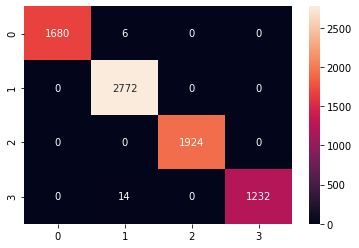

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(train_labels,val),annot=True,fmt='.4g')

In [54]:
df=pd.read_excel(r'drive/MyDrive/Data_Test.xlsx')
df.rename(columns={"STORY": "text","SECTION" :"target"},inplace=True)
df.head()

,text
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [55]:
df['text']=df['text'].map(lambda x:remove_url(x))
df['text']=df['text'].map(lambda x:remove_html(x))
df['text']=df['text'].map(lambda x:remove_emoji(x))
df['text']=df['text'].map(lambda x:remove_punct(x))
df['text']=df['text'].map(remove_stopwords)

df.head()

,text
0,2019 see gadgets like gaming smartphones weara...
1,It also unleashed wave changes MCU make sure f...
2,It confusing pick right smartphone segregated ...
3,The mobile application integrated dashboard co...
4,We rounded gadgets showed 2018 left indelible ...


In [56]:
import numpy as np
seq=tokenizer.texts_to_sequences(df['text'])
pad=pad_sequences(np.array(seq),maxlen=max_count,padding='post',truncating='post')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df['SECTION']=model.predict_classes(pad)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
df.drop('text',axis=1,inplace=True)
df.head()

,SECTION
0,1
1,2
2,1
3,1
4,1


In [59]:
df.to_csv(r'drive/MyDrive/Data_Test2.csv')

BY Multinomial Naive Bias

In [60]:
import pandas as pd
df=pd.read_excel(r'drive/MyDrive/Data_Train.xlsx')
df.rename(columns={"STORY": "text","SECTION" :"target"},inplace=True)

df['text']=df['text'].map(lambda x:remove_url(x))
df['text']=df['text'].map(lambda x:remove_html(x))
df['text']=df['text'].map(lambda x:remove_emoji(x))
df['text']=df['text'].map(lambda x:remove_punct(x))
df['text']=df['text'].map(remove_stopwords)

df.head()

,text,target
0,But painful huge reversal fee income unheard a...,3
1,How formidable opposition alliance among Congr...,0
2,Most Asian currencies trading lower today Sout...,3
3,If want answer question click ‘ Answer ’ After...,1
4,In global markets gold prices edged today disa...,3


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       498
           1       0.99      0.97      0.98       833
           2       0.98      0.96      0.97       567
           3       0.96      0.99      0.97       391

    accuracy                           0.97      2289
   macro avg       0.97      0.97      0.97      2289
weighted avg       0.97      0.97      0.97      2289



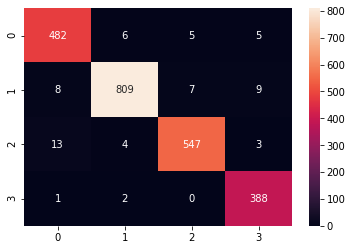

In [91]:
X = df['text']
y = df['target']

#using TF-IDF to retain features
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
tfidf = tf_idf(norm = None)
X=tfidf.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report

sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.4g')
print(classification_report(y_test,predictions))

In [92]:
nb.fit(X,y)
df2=pd.read_excel(r'drive/MyDrive/Data_Test.xlsx')
X_test = cv.transform(df2['STORY'])
vals=nb.predict(X_test)
df2['SECTION']=vals
df2.drop('STORY',axis=1,inplace=True)

In [93]:
df2.to_csv(r'drive/MyDrive/result2.csv')

In [94]:
import pickle
pickle.dump(nb, open( r"drive/MyDrive/model", "wb" ))
pickle.dump(cv, open( r"drive/MyDrive/tfidf_transform", "wb" ))